# Statistics and Probability Primer

In this notebook, we will explore some basic statistic and probability concepts that will be 
useful in this class, and in general for data science.

There are 2 parts to this notebook:
1. Basic descriptive statistics concepts.
2. Common probability distributions.

In [1]:
import matplotlib.pyplot as plt  # For creating plots and visualizations
import numpy as np  # For numerical computations and array operations
import scipy.stats as stats  # For statistical functions and distributions

# Descriptive Statistics

Descriptive statistics provide numerical and graphical summaries that describe the main characteristics of a dataset. 

## Key Categories of Descriptive Statistics

### 1. Measures of Central Tendency
These statistics describe the "center" or "typical" value of a dataset:

- **Mean (μ for population, or x̄ for sample)**: The arithmetic average of all values
  - Formula: μ = (Σx) / n
  - Sensitive to outliers
  - Best for normally distributed data

- **Median**: The middle value when data is ordered from smallest to largest
  - Less sensitive to outliers than the mean, better for skewed distributions
  - For even number of observations, it's the average of the two middle values

- **Mode**: The most frequently occurring value(s)
  - Can have multiple modes (bimodal, multimodal)
  - Useful for categorical data

### 2. Measures of Dispersion (Spread)
These statistics describe how spread out or variable the data points are:

- **Variance (σ² for population, or s² for sample)**: Average of squared deviations from the mean
  - Population variance: σ² = Σ(x - μ)² / N
  - Sample variance: s² = Σ(x - x̄)² / (n-1)  [uses n-1 for unbiased estimation]

- **Standard Deviation (σ or s)**: Square root of variance
  - Same units as the original data

### 3. Measures of Position
These statistics describe where specific values fall within the distribution:

- **Percentiles**: Values below which a certain percentage of data falls
  - 50th percentile = median
  - Useful for understanding relative position, commonly used in ranking

- **Quartiles**: Special percentiles that divide data into four equal parts
  - Q1 (25th percentile): First quartile
  - Q2 (50th percentile): Second quartile (median)
  - Q3 (75th percentile): Third quartile
  - IQR (Interquartile Range) = Q3 - Q1: Measures spread of middle 50% of data

### When to Use Each Measure

| Situation | Central Tendency | Dispersion |
|-----------|------------------|------------|
| "Normal" distribution, no outliers | Mean | Standard deviation |
| Skewed distribution or outliers | Median | IQR or median absolute deviation |
| Categorical data | Mode | - |

In [2]:
# Generate a random sample from a normal distribution for our statistical analysis
# This creates synthetic data that we can use to demonstrate statistical concepts
#
# We will set a random seed for reproducibility
# This ensures that random number generation produces the same results every time
# the cell is run, making our examples consistent and reproducible
np.random.seed(42)

# Parameters:
# - loc=1.0: Mean (μ) of the distribution - the center point
# - scale=5.0: Standard deviation (σ) - controls the spread of the data
# - size=1000: Number of samples to generate - larger samples give more stable statistics
mean = 1.0
std_dev = 5.0
n_samples = 1_000
X = np.random.normal(loc=mean, scale=std_dev, size=n_samples)

print(f"Generated {len(X)} samples from Normal(μ={mean}, σ={std_dev})")
print(f"Sample range: [{X.min():.2f}, {X.max():.2f}]")

Generated 1000 samples from Normal(μ=1.0, σ=5.0)
Sample range: [-15.21, 20.26]


In [3]:
# Calculate the sample mean (arithmetic average)
# The mean is the sum of all values divided by the number of values
# Formula: x̄ = (Σx) / n

# The sample mean should be close to the true population mean (1.0)
# With larger sample sizes, this approximation typically improves

x_mean = np.mean(X)
print(f"Sample mean: {x_mean:.4f}")
print(f"True population mean: 1.0000")
print(f"Difference from true mean: {abs(x_mean - 1.0):.4f}")

Sample mean: 1.0967
True population mean: 1.0000
Difference from true mean: 0.0967


In [4]:
# Calculate the sample median (middle value)
# The median is the value that separates the higher half from the lower half
# For normal distributions, median ≈ mean, but median is less sensitive to outliers

# For symmetric distributions like the normal distribution,
# the mean and median should be very close to each other

x_median = np.median(X)
print(f"Sample median: {x_median:.4f}")
print(f"Sample mean: {x_mean:.4f}")
print(f"Difference (mean - median): {x_mean - x_median:.4f}")

Sample median: 1.1265
Sample mean: 1.0967
Difference (mean - median): -0.0298


In [5]:
# Calculate the sample variance
# Variance measures how spread out the data points are from the mean
# Formula: s² = Σ(x - x̄)² / (n-1)
#
# ddof=1 (Delta Degrees of Freedom) uses n-1 in denominator instead of n
# This gives us the "unbiased" sample variance, which better estimates population variance

x_var = np.var(X, ddof=1)
print(f"Sample variance: {x_var:.4f}")
print(f"True population variance: {std_dev**2}")
print(f"Difference from true variance: {abs(x_var - std_dev**2):.4f}")

Sample variance: 23.9716
True population variance: 25.0
Difference from true variance: 1.0284


In [6]:
# Calculate standard deviation by taking the square root of variance
# Standard deviation has the same units as the original data (unlike variance)
# This makes it more interpretable than variance

x_std = np.sqrt(x_var)
print(f"Sample standard deviation (from variance): {x_std:.4f}")
print(f"True population standard deviation: {std_dev}")
print(f"Difference from true std dev: {abs(x_std - std_dev):.4f}")

Sample standard deviation (from variance): 4.8961
True population standard deviation: 5.0
Difference from true std dev: 0.1039


In [7]:
# Calculate the 25th percentile (first quartile, Q1)
# This is the value below which 25% of the data falls
# Also called the first quartile in the five-number summary

x_25th_quantile = np.quantile(X, q=0.25)
print(f"25th percentile (Q1): {x_25th_quantile:.4f}")
print(f"This means 25% of our data is below {x_25th_quantile:.4f}")

# For a normal distribution, we can calculate the theoretical Q1
theoretical_q1 = stats.norm.ppf(q=0.25, loc=mean, scale=std_dev)
print(f"Theoretical Q1 for Normal(1, 5): {theoretical_q1:.4f}")
print(f"Difference from theoretical: {abs(x_25th_quantile - theoretical_q1):.4f}")

25th percentile (Q1): -2.2380
This means 25% of our data is below -2.2380
Theoretical Q1 for Normal(1, 5): -2.3724
Difference from theoretical: 0.1345


In [8]:
# Calculate the 50th percentile (median, Q2)
# This is the value that splits the data in half
# Should be very close to our previously calculated median

x_50th_quantile = np.quantile(X, q=0.5)
print(f"50th percentile (Q2/Median): {x_50th_quantile:.4f}")
print(f"Previously calculated median: {x_median:.4f}")
print(f"Are they equal? {np.isclose(x_50th_quantile, x_median)}")

# Let's also calculate Q3 and the IQR (Interquartile Range)
x_75th_quantile = np.quantile(X, q=0.75)
iqr = x_75th_quantile - x_25th_quantile

print(f"\n75th percentile (Q3): {x_75th_quantile:.4f}")
print(f"IQR (Q3 - Q1): {iqr:.4f}")
print(f"The middle 50% of data spans {iqr:.2f} units")

50th percentile (Q2/Median): 1.1265
Previously calculated median: 1.1265
Are they equal? True

75th percentile (Q3): 4.2397
IQR (Q3 - Q1): 6.4777
The middle 50% of data spans 6.48 units


## Visual Representation of Data

Data visualization is crucial for understanding patterns, distributions, and relationships in data. Visual representations can reveal insights that might be missed in numerical summaries alone.

### Histogram

A **histogram** is a graphical representation that shows the frequency distribution of a continuous dataset. It provides an estimate of the probability distribution of the data.

#### How Histograms Work:

1. **Binning**: The range of values is divided into consecutive, non-overlapping intervals called "bins"
2. **Counting**: The number of data points falling into each bin is counted
3. **Plotting**: Bars are drawn with heights proportional to the frequency in each bin

#### Key Features:

- **Shape**: Reveals the distribution shape (normal, skewed, bimodal, etc.)
- **Center**: Shows where most of the data is concentrated
- **Spread**: Indicates the variability in the data
- **Outliers**: Extreme values appear as isolated bars

#### Interpreting Histograms:

- **Bell-shaped (Normal)**: Symmetric distribution with most data near the center
- **Right-skewed**: Tail extends toward higher values; mean > median. Example: income distribution.
- **Left-skewed**: Tail extends toward lower values; mean < median. Example: gestational age at birth.
- **Uniform**: Approximately equal frequencies across all bins. Example: rolling a fair die.
- **Bimodal**: Two distinct peaks, suggesting two subgroups in the data. Example: test scores of two groups.

#### Choosing the Number of Bins:

- **Too few bins**: May hide important details in the distribution
- **Too many bins**: May create noise and make patterns harder to see
- **Rule of thumb**: Start with √n bins for n data points, then adjust as needed

Number of bins used: 50
Most frequent bin contains 68 observations
The distribution appears approximately bell-shaped (normal)


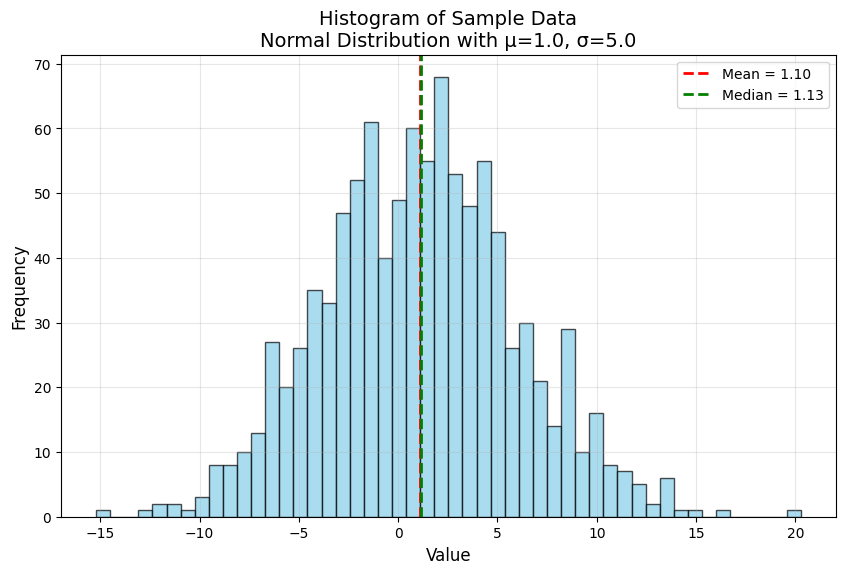

In [9]:
# Create a histogram to visualize the distribution of our data
# bins=50 creates 50 intervals across the data range for good detail

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(X, bins=50, alpha=0.7, color="skyblue", edgecolor="black")

# Add statistical information to the plot
plt.axvline(x_mean, color="red", linestyle="--", linewidth=2, label=f"Mean = {x_mean:.2f}")
plt.axvline(x_median, color="green", linestyle="--", linewidth=2, label=f"Median = {x_median:.2f}")

# Add labels and title
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title(f"Histogram of Sample Data\nNormal Distribution with μ={mean}, σ={std_dev}", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Print some insights about the histogram
print(f"Number of bins used: {len(bins)-1}")
print(f"Most frequent bin contains {int(max(n))} observations")
print(f"The distribution appears approximately bell-shaped (normal)")

plt.show()

### Box Plot (Box-and-Whisker Plot)

A **box plot** is a standardized graphical method for displaying the distribution of data through five key summary statistics, known as the "five-number summary."

#### The Five-Number Summary:

1. **Minimum**: The smallest value (excluding outliers)
2. **First Quartile (Q1)**: The 25th percentile
3. **Median (Q2)**: The 50th percentile (middle value)
4. **Third Quartile (Q3)**: The 75th percentile  
5. **Maximum**: The largest value (excluding outliers)

#### Box Plot Components:

- **Box**: Represents the interquartile range (IQR = Q3 - Q1)
  - Contains the middle 50% of the data
  - The line inside the box shows the median
- **Whiskers**: Lines extending from the box
  - Show the range of data within 1.5 × IQR from Q1 and Q3
  - Data beyond the whiskers are considered potential outliers
- **Outliers**: Individual points plotted beyond the whiskers
  - Values more than 1.5 × IQR below Q1 or above Q3

#### Advantages of Box Plots:

- **Outlier Detection**: Clearly identifies unusual values
- **Skewness**: Shows if data is symmetric or skewed
- **Spread**: Visualizes data variability through IQR
- **Comparison**: Easy to compare multiple distributions side-by-side
- **Robust**: Less affected by extreme values than histograms

#### Interpreting Box Plots:

- **Symmetric**: Median line in center of box, equal whisker lengths
- **Right-skewed**: Median closer to Q1, longer upper whisker
- **Left-skewed**: Median closer to Q3, longer lower whisker
- **Many outliers**: May suggest data quality issues or interesting subgroups

Five-Number Summary:
  Minimum (excluding outliers): -11.3582
  Q1 (25th percentile): -2.2380
  Median (Q2): 1.1265
  Q3 (75th percentile): 4.2397
  Maximum (excluding outliers): 13.8668

Additional Information:
  IQR (Q3 - Q1): 6.4777
  Number of outliers: 8
  Outlier range: [-15.2063, 20.2637]


/var/folders/ck/6xgx96j15vd6tcwzl68twbpc0000gn/T/ipykernel_62042/3664535177.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(X, patch_artist=True, labels=["Sample Data"])


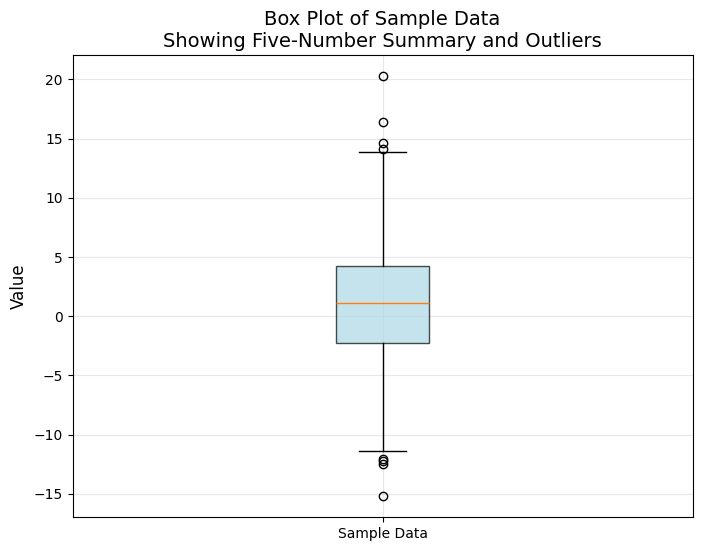

In [10]:
# Create a box plot to visualize the five-number summary
plt.figure(figsize=(8, 6))

# Create the box plot
box_plot = plt.boxplot(X, patch_artist=True, labels=["Sample Data"])

# Customize the appearance
box_plot["boxes"][0].set_facecolor("lightblue")
box_plot["boxes"][0].set_alpha(0.7)

# Add title and labels
plt.title("Box Plot of Sample Data\nShowing Five-Number Summary and Outliers", fontsize=14)
plt.ylabel("Value", fontsize=12)
plt.grid(True, alpha=0.3)

# Calculate and display the five-number summary
q1 = np.quantile(X, 0.25)
q2 = np.quantile(X, 0.50)  # median
q3 = np.quantile(X, 0.75)
iqr = q3 - q1

# Calculate outlier boundaries
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

# Count outliers
outliers = X[(X < lower_fence) | (X > upper_fence)]
num_outliers = len(outliers)

print("Five-Number Summary:")
print(f"  Minimum (excluding outliers): {np.min(X[X >= lower_fence]):.4f}")
print(f"  Q1 (25th percentile): {q1:.4f}")
print(f"  Median (Q2): {q2:.4f}")
print(f"  Q3 (75th percentile): {q3:.4f}")
print(f"  Maximum (excluding outliers): {np.max(X[X <= upper_fence]):.4f}")
print(f"\nAdditional Information:")
print(f"  IQR (Q3 - Q1): {iqr:.4f}")
print(f"  Number of outliers: {num_outliers}")
if num_outliers > 0:
    print(f"  Outlier range: [{outliers.min():.4f}, {outliers.max():.4f}]")

plt.show()

# Probability Distributions

## Introduction to Probability Distributions

A **probability distribution** is a mathematical function that describes the likelihood of different outcomes from a random process.

### Types of Probability Distributions

**Discrete Distributions**: Deal with countable outcomes (integers)
- Examples: Number of heads in coin flips, number of goals scored in a soccer match
- Use Probability Mass Function (PMF): P(X = k)

**Continuous Distributions**: Deal with uncountable outcomes (real numbers)
- Examples: Height of male adults in the US, S&P 500 stock index returns
- Use Probability Density Function (PDF): f(x)

### Key Properties

All probability distributions must satisfy:
1. **Non-negativity**: All probabilities ≥ 0
2. **Normalization**: Sum (discrete) or integral (continuous) equals 1

---

## Examples of Well-Known Distributions

Let's explore some fundamental probability distributions that appear frequently in statistics and data science.

### Bernoulli Distribution

The **Bernoulli distribution** is the simplest discrete probability distribution, modeling a single trial with exactly two possible outcomes: success (1) or failure (0).

#### Mathematical Definition

**PMF**: P(X = k) = p^k × (1-p)^(1-k), where k ∈ {0, 1}

**Parameters**:
- p: Probability of success (0 ≤ p ≤ 1)

**Properties**:
- Mean (μ): p
- Variance (σ²): p(1-p)
- Standard Deviation (σ): √[p(1-p)]

#### Real-World Examples

- **Coin flip**: Heads (1) or Tails (0)
- **Quality control**: Defective (1) or Non-defective (0) item
- **Medical test**: Positive (1) or Negative (0) result
- **Marketing**: Customer buys (1) or doesn't buy (0) product
- **Website**: User clicks (1) or doesn't click (0) ad

#### When to Use

Use Bernoulli when:
- You have exactly one trial
- Only two outcomes are possible
- You want to model binary events

Bernoulli Distribution with p = 0.6
P(X = 0) = 0.400
P(X = 1) = 0.600
Mean (μ) = 0.600
Variance (σ²) = 0.240
Standard Deviation (σ) = 0.490


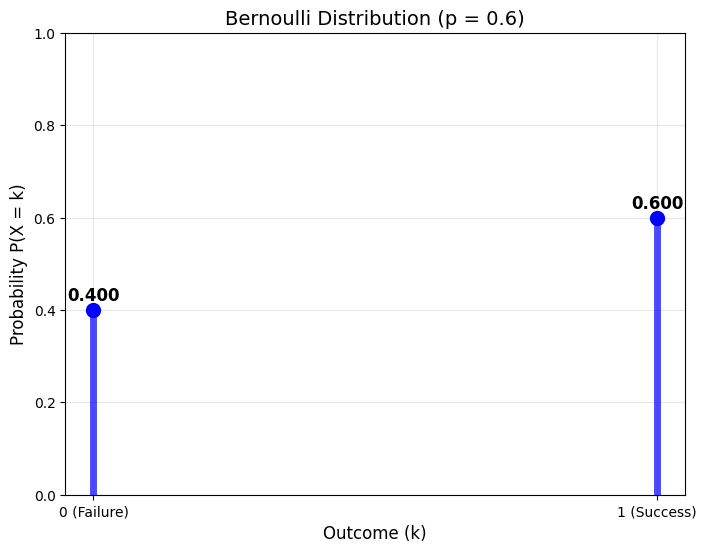

In [11]:
# Import the Bernoulli distribution from scipy.stats
from scipy.stats import bernoulli

# Set parameters for our Bernoulli distribution
p = 0.6  # Probability of success (60% chance)
k = [0, 1]  # Possible outcomes: 0 (failure), 1 (success)

# Calculate the probability mass function (PMF)
# This gives us P(X=0) and P(X=1)
pmf = bernoulli.pmf(k=k, p=p)

# Create a visualization of the Bernoulli distribution
plt.figure(figsize=(8, 6))
plt.plot(k, pmf, "bo", markersize=10, label="Probability")
plt.vlines(x=k, ymin=0, ymax=pmf, colors="blue", lw=5, alpha=0.7)

# Add labels and formatting
plt.xlabel("Outcome (k)", fontsize=12)
plt.ylabel("Probability P(X = k)", fontsize=12)
plt.title(f"Bernoulli Distribution (p = {p})", fontsize=14)
plt.xticks([0, 1], ["0 (Failure)", "1 (Success)"])
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)

# Add probability values as text
for i, prob in enumerate(pmf):
    plt.text(i, prob + 0.02, f"{prob:.3f}", ha="center", fontsize=12, fontweight="bold")

# Calculate and display statistics
mean = bernoulli.mean(p)
var = bernoulli.var(p)
std = bernoulli.std(p)

print(f"Bernoulli Distribution with p = {p}")
print(f"P(X = 0) = {pmf[0]:.3f}")
print(f"P(X = 1) = {pmf[1]:.3f}")
print(f"Mean (μ) = {mean:.3f}")
print(f"Variance (σ²) = {var:.3f}")
print(f"Standard Deviation (σ) = {std:.3f}")

plt.show()

### Binomial Distribution

The **Binomial distribution** models the number of successes in a fixed number of independent Bernoulli trials, each with the same probability of success. It's essentially multiple Bernoulli trials combined.

#### Mathematical Definition

**PMF**: P(X = k) = C(n,k) × p^k × (1-p)^(n-k)

Where C(n,k) = n!/(k!(n-k)!) is the binomial coefficient ("n choose k")

**Parameters**:
- n: Number of trials (fixed)
- p: Probability of success in each trial (0 ≤ p ≤ 1)
- k: Number of successes (0 ≤ k ≤ n)

**Properties**:
- Mean (μ): np
- Variance (σ²): np(1-p)
- Standard Deviation (σ): √[np(1-p)]

#### Real-World Examples

- **Quality Control**: Number of defective items in a batch of 100
- **Marketing**: Number of customers who respond to 50 email campaigns
- **Medicine**: Number of patients who recover out of 20 treated
- **Sports**: Number of free throws made out of 10 attempts
- **Polling**: Number of people supporting a candidate out of 1000 surveyed

#### Key Insights

- **Shape**: Can be symmetric (p=0.5) or skewed (p≠0.5)
- **Approximations**: 
  - Normal approximation works well when np > 5 and n(1-p) > 5
  - Poisson approximation when n is large and p is small

Binomial Distribution: n = 100, p = 0.6
Mean (μ) = np = 100 × 0.6 = 60.0
Variance (σ²) = np(1-p) = 100 × 0.6 × 0.4 = 24.0
Standard Deviation (σ) = 4.90
Most likely outcome: 60 successes
Probability of exactly 60 successes: 0.0812


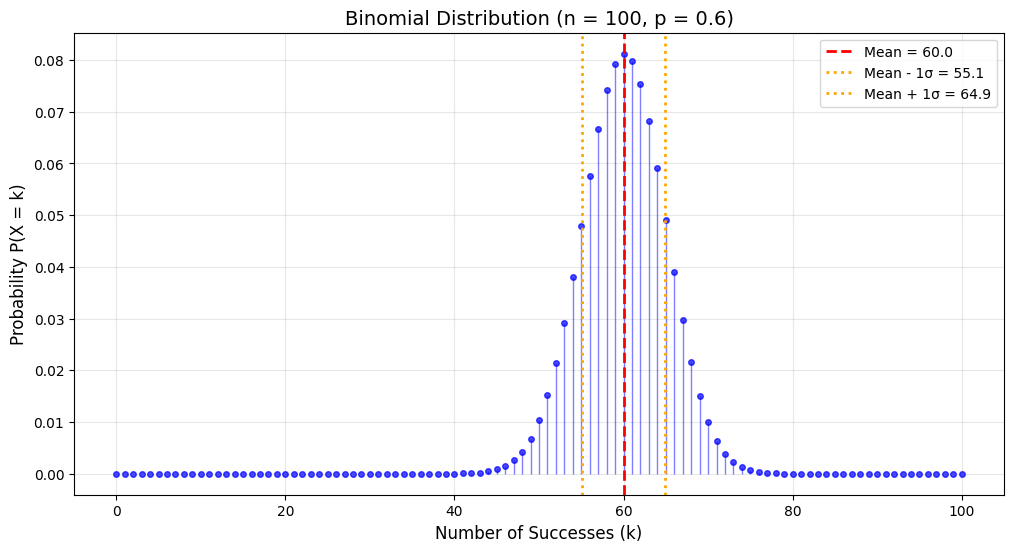

In [12]:
# Import the Binomial distribution from scipy.stats
from scipy.stats import binom

# Set parameters for our Binomial distribution
p = 0.6  # Probability of success in each trial (60% chance)
n = 100  # Number of trials

# Generate all possible outcomes (0 to n successes)
k = np.arange(start=0, stop=(n + 1), step=1)

# Calculate the probability mass function for all possible outcomes
pmf = binom.pmf(k=k, n=n, p=p)

# Create a visualization of the Binomial distribution
plt.figure(figsize=(12, 6))
plt.plot(k, pmf, "bo", markersize=4, alpha=0.7)
plt.vlines(x=k, ymin=0, ymax=pmf, colors="blue", lw=1, alpha=0.5)

# Calculate and display key statistics
mean = binom.mean(n, p)
var = binom.var(n, p)
std = binom.std(n, p)

# Add vertical lines for mean and standard deviation bounds
plt.axvline(mean, color="red", linestyle="--", linewidth=2,
           label=f"Mean = {mean:.1f}")
plt.axvline(mean - std, color="orange", linestyle=":", linewidth=2,
           label=f"Mean - 1σ = {mean-std:.1f}")
plt.axvline(mean + std, color="orange", linestyle=":", linewidth=2,
           label=f"Mean + 1σ = {mean+std:.1f}")

# Add labels and formatting
plt.xlabel("Number of Successes (k)", fontsize=12)
plt.ylabel("Probability P(X = k)", fontsize=12)
plt.title(f"Binomial Distribution (n = {n}, p = {p})", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Print statistics
print(f"Binomial Distribution: n = {n}, p = {p}")
print(f"Mean (μ) = np = {n} × {p} = {mean:.1f}")
print(f"Variance (σ²) = np(1-p) = {n} × {p} × {1-p} = {var:.1f}")
print(f"Standard Deviation (σ) = {std:.2f}")
print(f"Most likely outcome: {k[np.argmax(pmf)]} successes")
print(f"Probability of exactly {int(mean)} successes: {binom.pmf(int(mean), n, p):.4f}")

plt.show()

### Geometric Distribution

The **Geometric distribution** models the number of trials needed to achieve the *first success* in a sequence of independent Bernoulli trials. It answers the question: "How long do I have to wait for the first success?"

#### Mathematical Definition

**PMF**: P(X = k) = (1-p)^(k-1) × p, where k = 1, 2, 3, ...

**Parameters**:
- p: Probability of success in each trial (0 < p ≤ 1)
- k: Number of trials until first success (k ≥ 1)

**Properties**:
- Mean (μ): 1/p
- Variance (σ²): (1-p)/p²
- Standard Deviation (σ): √[(1-p)/p²]
- **Memoryless Property**: P(X > s+t | X > s) = P(X > t)

#### Real-World Examples

- **Manufacturing**: Number of items inspected until finding the first defective one
- **Sales**: Number of calls made until getting the first sale
- **Gaming**: Number of rolls until getting the first six on a die
- **Medicine**: Number of patients treated until the first successful recovery
- **Software Testing**: Number of tests run until finding the first bug

#### Key Insights

- **Right-skewed**: Always has a long tail toward higher values
- **Mode**: Always k = 1 (most likely to succeed on first try)
- **Memoryless**: Past failures don't affect future success probability
- **Relationship**: If X ~ Geometric(p), then P(X > k) = (1-p)^k

Geometric Distribution: p = 0.2
Mean (μ) = 1/p = 1/0.2 = 5.0 trials
Variance (σ²) = (1-p)/p² = 20.00
Standard Deviation (σ) = 4.47

Probabilities:
P(Success on 1st trial) = 0.2000
P(Success on 2nd trial) = 0.1600
P(Success on 3rd trial) = 0.1280
P(Success within 5 trials) = 0.6723
P(Need more than 10 trials) = 0.1074


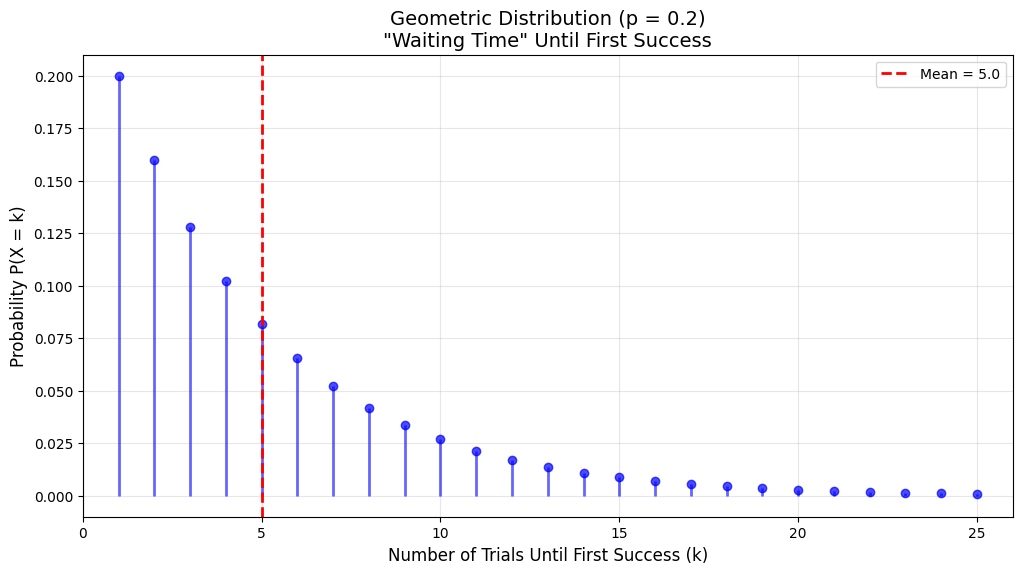

In [13]:
# Import the Geometric distribution from scipy.stats
from scipy.stats import geom

# Set parameters for our Geometric distribution
p = 0.2  # Probability of success in each trial (20% chance)

# Note: scipy.stats.geom uses a different parameterization where k starts from 1
# Generate possible outcomes (number of trials until first success)
max_trials = 25  # Show first 25 possible trials
k = np.arange(start=1, stop=max_trials + 1, step=1)

# Calculate the probability mass function
pmf = geom.pmf(k=k, p=p)

# Create a visualization of the Geometric distribution
plt.figure(figsize=(12, 6))
plt.plot(k, pmf, "bo", markersize=6, alpha=0.7)
plt.vlines(x=k, ymin=0, ymax=pmf, colors="blue", lw=2, alpha=0.6)

# Calculate and display key statistics
mean = geom.mean(p)
var = geom.var(p)
std = geom.std(p)

# Add vertical line for mean
plt.axvline(mean, color="red", linestyle="--", linewidth=2,
           label=f"Mean = {mean:.1f}")

# Add labels and formatting
plt.xlabel("Number of Trials Until First Success (k)", fontsize=12)
plt.ylabel("Probability P(X = k)", fontsize=12)
plt.title(f"Geometric Distribution (p = {p})\n\"Waiting Time\" Until First Success", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, max_trials + 1)

# Print statistics and insights
print(f"Geometric Distribution: p = {p}")
print(f"Mean (μ) = 1/p = 1/{p} = {mean:.1f} trials")
print(f"Variance (σ²) = (1-p)/p² = {var:.2f}")
print(f"Standard Deviation (σ) = {std:.2f}")
print(f"\nProbabilities:")
print(f"P(Success on 1st trial) = {geom.pmf(1, p):.4f}")
print(f"P(Success on 2nd trial) = {geom.pmf(2, p):.4f}")
print(f"P(Success on 3rd trial) = {geom.pmf(3, p):.4f}")
print(f"P(Success within 5 trials) = {geom.cdf(5, p):.4f}")
print(f"P(Need more than 10 trials) = {1 - geom.cdf(10, p):.4f}")

plt.show()

### Uniform Distribution

The **Uniform distribution** is a continuous probability distribution where all outcomes within a specified range are equally likely. It represents complete uncertainty within a bounded interval.

#### Mathematical Definition

**PDF**: f(x) = 1/(b-a) for a ≤ x ≤ b, and 0 otherwise

**Parameters**:
- a: Lower bound (minimum value)
- b: Upper bound (maximum value)
- Interval: [a, b]

**Properties**:
- Mean (μ): (a + b)/2
- Variance (σ²): (b - a)²/12
- Standard Deviation (σ): (b - a)/√12
- **Flat PDF**: Constant probability density across the interval

#### Real-World Examples

- **Random Number Generation**: Computer-generated random numbers
- **Manufacturing**: Measurement errors within tolerance limits
- **Scheduling**: Arrival times within a time window
- **Geology**: Mineral deposits uniformly distributed in a region
- **Finance**: Modeling price changes within a known range

#### Key Insights

- **Shape**: Rectangular (flat) probability density
- **Symmetry**: Perfectly symmetric around the mean
- **Maximum Entropy**: Among all distributions with given bounds, uniform has maximum entropy
- **Basis for Simulation**: Used to generate other distributions via transformation

Uniform Distribution on [-1, 2]
Mean (μ) = (a + b)/2 = (-1 + 2)/2 = 0.5
Variance (σ²) = (b - a)²/12 = (2 - -1)²/12 = 0.7500
Standard Deviation (σ) = 0.8660
PDF value = 1/(b - a) = 1/3 = 0.3333

Probabilities (for continuous distributions, we use intervals):
P(0 ≤ X ≤ 1) = 0.3333
P(X ≤ 0) = 0.3333
P(X > 1.5) = 0.1667


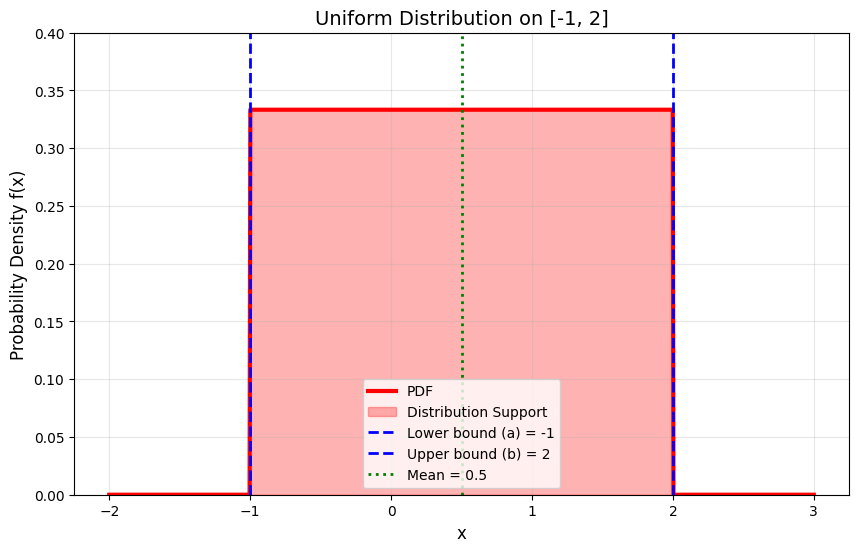

In [14]:
# Import the Uniform distribution from scipy.stats
from scipy.stats import uniform

# Set parameters for our Uniform distribution
# Note: scipy.stats.uniform uses loc (start) and scale (width) parameterization
# For uniform distribution on [a, b]: loc = a, scale = b - a
a, b = -1, 2  # Distribution on interval [-1, 2]
loc = a       # Starting point
scale = b - a # Width of the interval

# Generate x values for plotting the PDF
x = np.linspace(start=a-1, stop=b+1, num=1000)

# Calculate the probability density function
pdf = uniform.pdf(x, loc=loc, scale=scale)

# Create a visualization of the Uniform distribution
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, "r-", linewidth=3, label="PDF")
plt.fill_between(x, pdf, alpha=0.3, color="red",
                 where=(x >= a) & (x <= b), label="Distribution Support")

# Calculate and display key statistics
mean = uniform.mean(loc=loc, scale=scale)
var = uniform.var(loc=loc, scale=scale)
std = uniform.std(loc=loc, scale=scale)

# Add vertical lines for bounds and mean
plt.axvline(a, color="blue", linestyle="--", linewidth=2, label=f"Lower bound (a) = {a}")
plt.axvline(b, color="blue", linestyle="--", linewidth=2, label=f"Upper bound (b) = {b}")
plt.axvline(mean, color="green", linestyle=":", linewidth=2, label=f"Mean = {mean:.1f}")

# Add labels and formatting
plt.xlabel("x", fontsize=12)
plt.ylabel("Probability Density f(x)", fontsize=12)
plt.title(f"Uniform Distribution on [{a}, {b}]", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, max(pdf) * 1.2)

# Print statistics and insights
print(f"Uniform Distribution on [{a}, {b}]")
print(f"Mean (μ) = (a + b)/2 = ({a} + {b})/2 = {mean:.1f}")
print(f"Variance (σ²) = (b - a)²/12 = ({b} - {a})²/12 = {var:.4f}")
print(f"Standard Deviation (σ) = {std:.4f}")
print(f"PDF value = 1/(b - a) = 1/{scale} = {1/scale:.4f}")
print(f"\nProbabilities (for continuous distributions, we use intervals):")
print(f"P(0 ≤ X ≤ 1) = {uniform.cdf(1, loc=loc, scale=scale) - uniform.cdf(0, loc=loc, scale=scale):.4f}")
print(f"P(X ≤ 0) = {uniform.cdf(0, loc=loc, scale=scale):.4f}")
print(f"P(X > 1.5) = {1 - uniform.cdf(1.5, loc=loc, scale=scale):.4f}")

plt.show()

### Normal (Gaussian) Distribution

The **Normal distribution**, also known as the Gaussian distribution, is the most important continuous probability distribution in statistics. It has a characteristic bell-shaped curve and describes many natural phenomena.

#### Mathematical Definition

**PDF**: f(x) = (1/(σ√(2π))) × e^(-½((x-μ)/σ)²)

**Parameters**:
- μ (mu): Mean (location parameter)
- σ (sigma): Standard deviation (scale parameter, σ > 0)
- σ² (sigma squared): Variance

**Properties**:
- Mean = Median = Mode = μ
- Variance = σ²
- **68-95-99.7 Rule**: ~68% within 1σ, ~95% within 2σ, ~99.7% within 3σ
- **Symmetric**: Around the mean
- **Bell-shaped**: Single peak at the mean

#### Why the Normal Distribution is Special

1. **Central Limit Theorem**: Sample means approach normal distribution
2. **Mathematical Tractability**: Many statistical methods assume normality
3. **Natural Occurrence**: Many real-world phenomena are approximately normal
4. **Linear Combinations**: Sum of normal variables is normal
5. **Maximum Entropy**: Among all distributions with given mean and variance

#### Real-World Examples

- **Human Characteristics**: Heights, weights, IQ scores
- **Measurement Errors**: Scientific instrument readings
- **Financial Markets**: Daily stock returns (approximately)
- **Manufacturing**: Product dimensions and quality metrics
- **Test Scores**: Standardized exam results
- **Natural Phenomena**: Temperature variations, rainfall amounts

#### Standard Normal Distribution

Special case: μ = 0, σ = 1
- **Z-scores**: Z = (X - μ)/σ transforms any normal to standard normal
- **Standard tables**: Used for probability calculations
- **Critical values**: Used in hypothesis testing and confidence intervals

Standard Normal Distribution: μ = 0, σ = 1
Mean = 0.0
Variance = 1.0
Standard Deviation = 1.0

68-95-99.7 Rule:
P(-1σ ≤ X ≤ +1σ) = P(-1 ≤ X ≤ 1) = 0.6827
P(-2σ ≤ X ≤ +2σ) = P(-2 ≤ X ≤ 2) = 0.9545
P(-3σ ≤ X ≤ +3σ) = P(-3 ≤ X ≤ 3) = 0.9973

Other probabilities:
P(X ≤ 0) = 0.5000
P(X > 1.96) = 0.0250


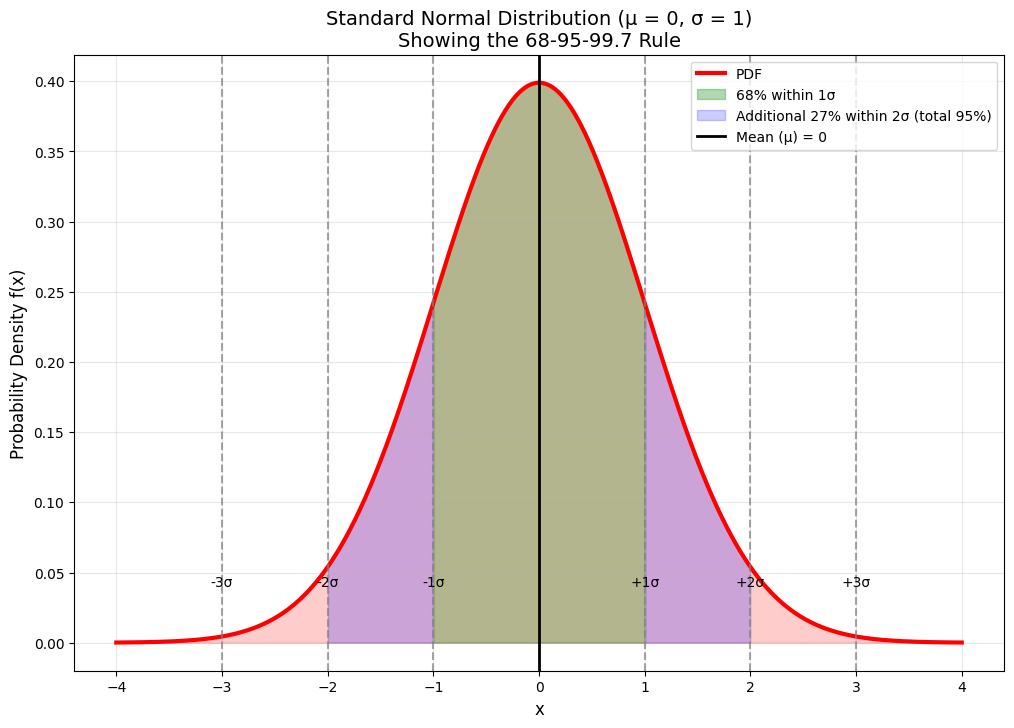


--- Comparison with Our Original Sample ---
Our sample was drawn from Normal(μ=1.0, σ=5.0)
Sample mean: 1.0967 vs True mean: 1.0
Sample std: 4.8961 vs True std: 5.0
This demonstrates how sample statistics estimate population parameters!


In [15]:
# Import the Normal distribution from scipy.stats
from scipy.stats import norm

# Set parameters for our Normal distribution
mu = 0    # Mean
sigma = 1 # Standard deviation

# Generate x values for plotting (showing ±4 standard deviations)
x = np.linspace(start=mu-4*sigma, stop=mu+4*sigma, num=1000)

# Calculate the probability density function
pdf = norm.pdf(x, loc=mu, scale=sigma)

# Create a comprehensive visualization of the Normal distribution
plt.figure(figsize=(12, 8))

# Plot the main PDF curve
plt.plot(x, pdf, "r-", linewidth=3, label="PDF")
plt.fill_between(x, pdf, alpha=0.2, color="red")

# Highlight the 68-95-99.7 rule areas
# 68% within 1 standard deviation
x_1sigma = x[(x >= mu-sigma) & (x <= mu+sigma)]
pdf_1sigma = norm.pdf(x_1sigma, loc=mu, scale=sigma)
plt.fill_between(x_1sigma, pdf_1sigma, alpha=0.3, color="green",
                 label="68% within 1σ")

# 95% within 2 standard deviations (additional area)
x_2sigma_left = x[(x >= mu-2*sigma) & (x < mu-sigma)]
x_2sigma_right = x[(x > mu+sigma) & (x <= mu+2*sigma)]
pdf_2sigma_left = norm.pdf(x_2sigma_left, loc=mu, scale=sigma)
pdf_2sigma_right = norm.pdf(x_2sigma_right, loc=mu, scale=sigma)
plt.fill_between(x_2sigma_left, pdf_2sigma_left, alpha=0.2, color="blue")
plt.fill_between(x_2sigma_right, pdf_2sigma_right, alpha=0.2, color="blue",
                 label="Additional 27% within 2σ (total 95%)")

# Add vertical lines for mean and standard deviations
plt.axvline(mu, color="black", linestyle="-", linewidth=2, label=f"Mean (μ) = {mu}")
for i in range(1, 4):
    plt.axvline(mu + i*sigma, color="gray", linestyle="--", alpha=0.7)
    plt.axvline(mu - i*sigma, color="gray", linestyle="--", alpha=0.7)

# Label the standard deviation markers
plt.text(mu + sigma, max(pdf)*0.1, "+1σ", ha="center", fontsize=10)
plt.text(mu - sigma, max(pdf)*0.1, "-1σ", ha="center", fontsize=10)
plt.text(mu + 2*sigma, max(pdf)*0.1, "+2σ", ha="center", fontsize=10)
plt.text(mu - 2*sigma, max(pdf)*0.1, "-2σ", ha="center", fontsize=10)
plt.text(mu + 3*sigma, max(pdf)*0.1, "+3σ", ha="center", fontsize=10)
plt.text(mu - 3*sigma, max(pdf)*0.1, "-3σ", ha="center", fontsize=10)

# Add labels and formatting
plt.xlabel("x", fontsize=12)
plt.ylabel("Probability Density f(x)", fontsize=12)
plt.title(f"Standard Normal Distribution (μ = {mu}, σ = {sigma})\nShowing the 68-95-99.7 Rule", fontsize=14)
plt.legend(loc="upper right")
plt.grid(True, alpha=0.3)

# Calculate and display key statistics and probabilities
mean = norm.mean(loc=mu, scale=sigma)
var = norm.var(loc=mu, scale=sigma)
std = norm.std(loc=mu, scale=sigma)

print(f"Standard Normal Distribution: μ = {mu}, σ = {sigma}")
print(f"Mean = {mean}")
print(f"Variance = {var}")
print(f"Standard Deviation = {std}")
print(f"\n68-95-99.7 Rule:")
print(f"P(-1σ ≤ X ≤ +1σ) = P({mu-sigma} ≤ X ≤ {mu+sigma}) = {norm.cdf(mu+sigma, mu, sigma) - norm.cdf(mu-sigma, mu, sigma):.4f}")
print(f"P(-2σ ≤ X ≤ +2σ) = P({mu-2*sigma} ≤ X ≤ {mu+2*sigma}) = {norm.cdf(mu+2*sigma, mu, sigma) - norm.cdf(mu-2*sigma, mu, sigma):.4f}")
print(f"P(-3σ ≤ X ≤ +3σ) = P({mu-3*sigma} ≤ X ≤ {mu+3*sigma}) = {norm.cdf(mu+3*sigma, mu, sigma) - norm.cdf(mu-3*sigma, mu, sigma):.4f}")
print(f"\nOther probabilities:")
print(f"P(X ≤ 0) = {norm.cdf(0, mu, sigma):.4f}")
print(f"P(X > 1.96) = {1 - norm.cdf(1.96, mu, sigma):.4f}")

plt.show()

# Demonstrate the relationship to our original sample
print(f"\n--- Comparison with Our Original Sample ---")
print(f"Our sample was drawn from Normal(μ=1.0, σ=5.0)")
print(f"Sample mean: {x_mean:.4f} vs True mean: 1.0")
print(f"Sample std: {x_std:.4f} vs True std: 5.0")
print(f"This demonstrates how sample statistics estimate population parameters!")